#### Decide churn label on the basis of recency

In [183]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [184]:
df = pd.read_csv('clv_data.csv')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113760 entries, 0 to 113759
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113760 non-null  object 
 1   customer_unique_id             113760 non-null  object 
 2   customer_zip_code_prefix       113760 non-null  int64  
 3   customer_city                  113760 non-null  object 
 4   customer_state                 113760 non-null  object 
 5   order_id                       113760 non-null  object 
 6   order_status                   113760 non-null  object 
 7   order_purchase_timestamp       113760 non-null  object 
 8   order_approved_at              113760 non-null  object 
 9   order_delivered_carrier_date   113760 non-null  object 
 10  order_delivered_customer_date  113760 non-null  object 
 11  order_estimated_delivery_date  113760 non-null  object 
 12  purchased_approved            

In [186]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
purchased_approved                    0
approved_carrier                      0
carrier_delivered                     0
delivered_estimated                   0
purchased_delivered                   0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0


#### Creating a target variable
##### Assumption of Inactivity: The approach assumes that customers who haven't made a purchase recently are more likely to churn.


In [187]:
# Assuming churn threshold as 180(also give reason why ?)
churn_threshold_days = 180
df['churn'] = (df['recency'] > churn_threshold_days).astype(int)

In [188]:
df['churn'].value_counts(normalize=True)*100

churn
1    59.690577
0    40.309423
Name: proportion, dtype: float64

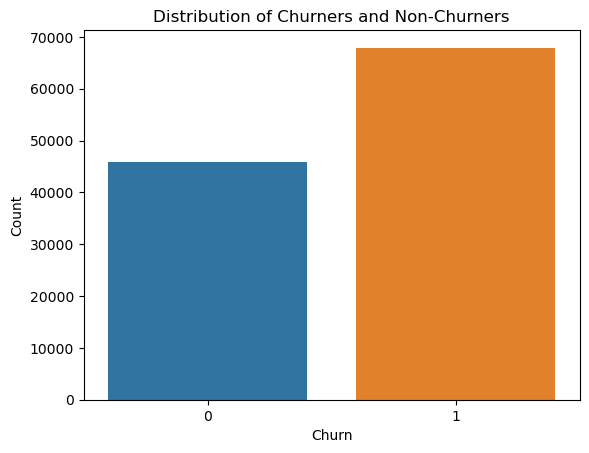

In [189]:
# Visualize the churn segmentation
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churners and Non-Churners')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


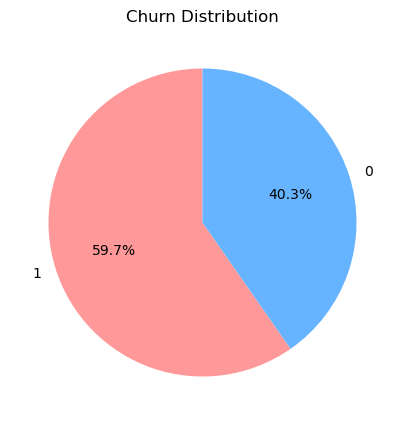

In [190]:
churn_counts = df['churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Churn Distribution')
plt.show()

In [191]:
df['churn'].dtype

dtype('int64')

### Droping unnescessary features

In [192]:
# Drop unnecessary features
unnecessary_features = [
    'customer_id','customer_unique_id','customer_city',
    'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 'carrier_delivered',

    'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty','seller_city','seller_state',
    'geolocation_zip_code_prefix',
    'payment_sequential','purchased_approved','delivered_estimated','purchased_delivered',
    'seller_zip_code_prefix', 'payment_value',
    'product_category_name_english','product_category_name','customer_zip_code_prefix',
    'review_id', 'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp','late_deliveries'
]

# Drop unnecessary features from the DataFrame
final = df.drop(unnecessary_features, axis=1)


In [193]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113760 entries, 0 to 113759
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        113760 non-null  object 
 1   price                 113760 non-null  float64
 2   freight_value         113760 non-null  float64
 3   product_weight_g      113760 non-null  float64
 4   product_length_cm     113760 non-null  float64
 5   product_height_cm     113760 non-null  float64
 6   product_width_cm      113760 non-null  float64
 7   geolocation_lat       113760 non-null  float64
 8   geolocation_lng       113760 non-null  float64
 9   payment_type          113760 non-null  object 
 10  payment_installments  113760 non-null  int64  
 11  review_score          112912 non-null  float64
 12  recency               113760 non-null  int64  
 13  frequency             113760 non-null  int64  
 14  monetary_value        113760 non-null  float64
 15  

In [194]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4.0,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1.0,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1.0,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3.0,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4.0,206,1,137.58,0,1,1


In [195]:
final['review_score'].unique()

array([ 4.,  1.,  3.,  2.,  5., nan])

In [196]:
final['review_score'].value_counts()

review_score
5.0    64981
4.0    21756
1.0    12832
3.0     9512
2.0     3831
Name: count, dtype: int64

In [197]:
final.isna().sum() / len(final) * 100

customer_state          0.000000
price                   0.000000
freight_value           0.000000
product_weight_g        0.000000
product_length_cm       0.000000
product_height_cm       0.000000
product_width_cm        0.000000
geolocation_lat         0.000000
geolocation_lng         0.000000
payment_type            0.000000
payment_installments    0.000000
review_score            0.745429
recency                 0.000000
frequency               0.000000
monetary_value          0.000000
customer_tenure         0.000000
num_orders              0.000000
churn                   0.000000
dtype: float64

### Treating null values in review_score

In [198]:
mean_score = int(final['review_score'].fillna(0).mean())
mean_score

4

In [199]:
final['review_score'] = df['review_score'].fillna(mean_score).astype(int)

In [200]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4,206,1,137.58,0,1,1


In [201]:
final.isna().sum()

customer_state          0
price                   0
freight_value           0
product_weight_g        0
product_length_cm       0
product_height_cm       0
product_width_cm        0
geolocation_lat         0
geolocation_lng         0
payment_type            0
payment_installments    0
review_score            0
recency                 0
frequency               0
monetary_value          0
customer_tenure         0
num_orders              0
churn                   0
dtype: int64

In [202]:
final.shape

(113760, 18)

In [203]:
final.duplicated().sum()

12965

In [204]:
final = final.drop_duplicates()
final.shape

(100795, 18)

#### Outliers treatment:

In [205]:
print(final.describe())

               price  freight_value  product_weight_g  product_length_cm  \
count  100795.000000  100795.000000     100795.000000      100795.000000   
mean      123.963171      20.123662       2095.881681          30.164562   
std       187.732667      15.805478       3743.952313          16.104948   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.800000      13.160000        300.000000          18.000000   
50%        78.000000      16.360000        700.000000          25.000000   
75%       139.000000      21.260000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count      100795.000000     100795.000000    100795.000000    100795.000000   
mean           16.416241         23.099846       -21.139621       -46.126808   
std            13.297973         11.745547         5.669582         4.09421

In [206]:
# Identify outliers using z-score
from scipy import stats
print(f'Number of rows before filtering outliers : {len(final)}')

filtered_entries = np.array ([True] * len(final))

for col in ['recency', 'frequency', 'monetary_value', 'customer_tenure', 'freight_value','price','num_orders',\
            'product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_installments',\
           'geolocation_lat','geolocation_lng']:
  zscore = abs(stats.zscore(final[col]))
  filtered_entries = (zscore < 3)

final = final[filtered_entries]
print(f'Number of rows after filtering outlier : {len(final)}')


Number of rows before filtering outliers : 100795
Number of rows after filtering outlier : 100179


In [207]:
print(final.describe())

               price  freight_value  product_weight_g  product_length_cm  \
count  100179.000000  100179.000000     100179.000000      100179.000000   
mean      123.710915      20.013576       2095.585462          30.170854   
std       187.322199      15.686786       3741.849061          16.110140   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.600000      13.120000        300.000000          18.000000   
50%        78.000000      16.320000        700.000000          25.000000   
75%       139.000000      21.150000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count      100179.000000     100179.000000    100179.000000    100179.000000   
mean           16.417553         23.101898       -21.230594       -46.038654   
std            13.301016         11.744247         5.517036         3.86759

#### Observation:
since most of the customers are one timers, and std of num_orders is almost 0, dropping both the features as they
won't add any values in model trianing

In [208]:
final.drop(columns = ['num_orders', 'frequency'], axis = 1, inplace = True)

### Creating a new df for model 

In [209]:
model_df = final.copy()
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,4,469,146.87,0,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,1,293,551.58,0,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,3,478,140.61,0,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,4,206,137.58,0,1
5,SC,126.99,15.06,8683.0,54.0,64.0,31.0,-27.563095,-48.983780,credit_card,5,4,523,142.05,0,1


### Target Imbalance:

In [210]:
class_distribution = model_df['churn'].value_counts()
print(class_distribution)

churn
1    59557
0    40622
Name: count, dtype: int64


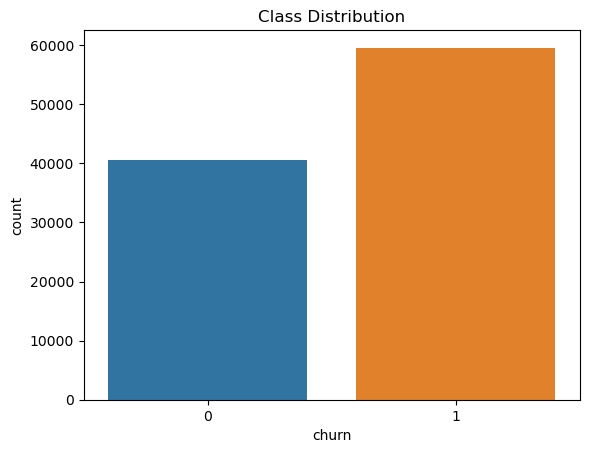

In [211]:
sns.countplot(x='churn', data=model_df)
plt.title('Class Distribution')
plt.show()

#### Target is balanced. 

In [212]:
from sklearn.preprocessing import PowerTransformer

# Select the columns to transform
columns_to_transform = [ 'geolocation_lat', 'geolocation_lng']

# Fit the PowerTransformer on the selected columns
pt = PowerTransformer(method='yeo-johnson')
model_df[columns_to_transform] = pt.fit_transform(model_df[columns_to_transform])


In [213]:
# Select the columns to transform
columns_to_transform_box_cox = [col for col in model_df.select_dtypes(include=np.number).\
                                columns if col not in [ 'geolocation_lat', 'geolocation_lng','churn','review_score']]

# Fit the PowerTransformer on the selected columns using Box-Cox method
pt_box_cox = PowerTransformer(method='box-cox')
model_df[columns_to_transform_box_cox] = pt_box_cox.fit_transform(0.001 + model_df[columns_to_transform_box_cox])

#### Observation:

1. The variables which have negative values are transformed using yeo-johnson method, as log of 0 or negative values would return infinite value.
2. The variables which has only positive values in it are transformed using box-cox method.

#### Data Transformation

In [214]:
def state_encoding(state):
    if state in ['RS', 'SC', 'PR']:
        return 'southern'
    elif state in ['SP', 'RJ', 'MG', 'ES']:
        return 'southeastern'
    elif state in ['MT', 'MS', 'GO', 'DF']:
        return 'centralwestern'
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return 'northeastern'
    else: 
        return 'northern'

In [215]:
model_df['customer_state'] = model_df['customer_state'].apply(state_encoding)

#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

In [216]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,southeastern,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,credit_card,0.085549,4,1.351269,0.231236,-0.218103,1
1,northern,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,credit_card,-0.909181,1,0.476697,1.415916,-0.218103,1
3,southern,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,credit_card,1.451582,3,1.391604,0.185254,-0.218103,1
4,southeastern,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,credit_card,1.758923,4,-0.044579,0.162070,-0.218103,1
5,southern,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,credit_card,1.131397,4,1.588369,0.196054,-0.218103,1


#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

In [217]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100179 entries, 0 to 113759
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        100179 non-null  object 
 1   price                 100179 non-null  float64
 2   freight_value         100179 non-null  float64
 3   product_weight_g      100179 non-null  float64
 4   product_length_cm     100179 non-null  float64
 5   product_height_cm     100179 non-null  float64
 6   product_width_cm      100179 non-null  float64
 7   geolocation_lat       100179 non-null  float64
 8   geolocation_lng       100179 non-null  float64
 9   payment_type          100179 non-null  object 
 10  payment_installments  100179 non-null  float64
 11  review_score          100179 non-null  int64  
 12  recency               100179 non-null  float64
 13  monetary_value        100179 non-null  float64
 14  customer_tenure       100179 non-null  float64
 15  churn

### Label encoding

#### feature transformation

In [218]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding for columns
for col in ['customer_state', 'payment_type']:
    model_df[col] = label_encoder.fit_transform(model_df[col])

In [219]:
# Pair Plots (Numeric)
#sns.pairplot(model_df, diag_kind='kde', hue='churn')

In [220]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,1.351269,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,0.476697,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,1.391604,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,-0.044579,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,1.588369,0.196054,-0.218103,1


#### Now, to see which number associated with which label

#### To determine the importance of features for predicting churn
This fits a Random Forest classifier on the data, extracts feature importances, and then displays them in a DataFrame. Features with higher importance values are considered more influential in predicting churn.

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = model_df.drop('churn', axis=1)
y = model_df['churn']


In [222]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [224]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [225]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [226]:
# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [227]:
# Display the feature importances
print(importances_df)

                 Feature  Importance
12               recency    0.912569
2          freight_value    0.045094
3       product_weight_g    0.006054
7        geolocation_lat    0.005695
1                  price    0.005170
13        monetary_value    0.005141
8        geolocation_lng    0.004458
6       product_width_cm    0.003770
4      product_length_cm    0.003602
5      product_height_cm    0.003186
0         customer_state    0.002808
10  payment_installments    0.001182
11          review_score    0.000679
9           payment_type    0.000410
14       customer_tenure    0.000182


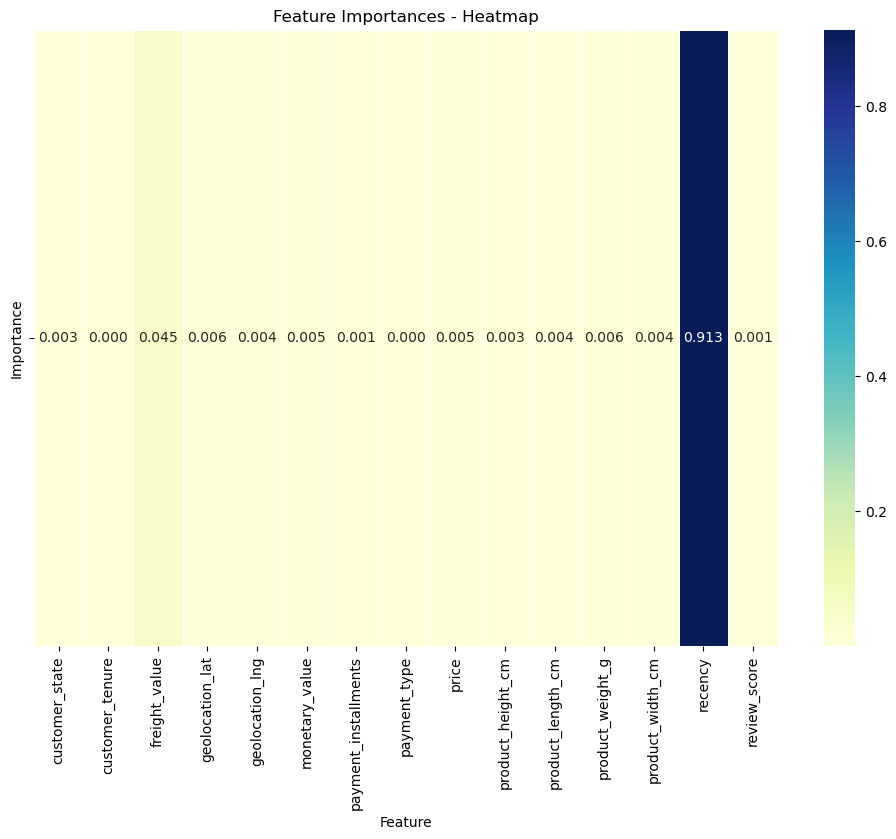

In [228]:
import seaborn as sns

# Increase figure size
plt.figure(figsize=(12, 8))

# Plotting a seaborn heatmap with numbers
sns.heatmap(importances_df.pivot_table(index='Feature', values='Importance').T,
            cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)

plt.title('Feature Importances - Heatmap')
plt.show()



#### Importance of features: correlation:

In [229]:
correlation_matrix = model_df.corr()
correlation_with_churn = correlation_matrix['churn'].abs().sort_values(ascending=False)


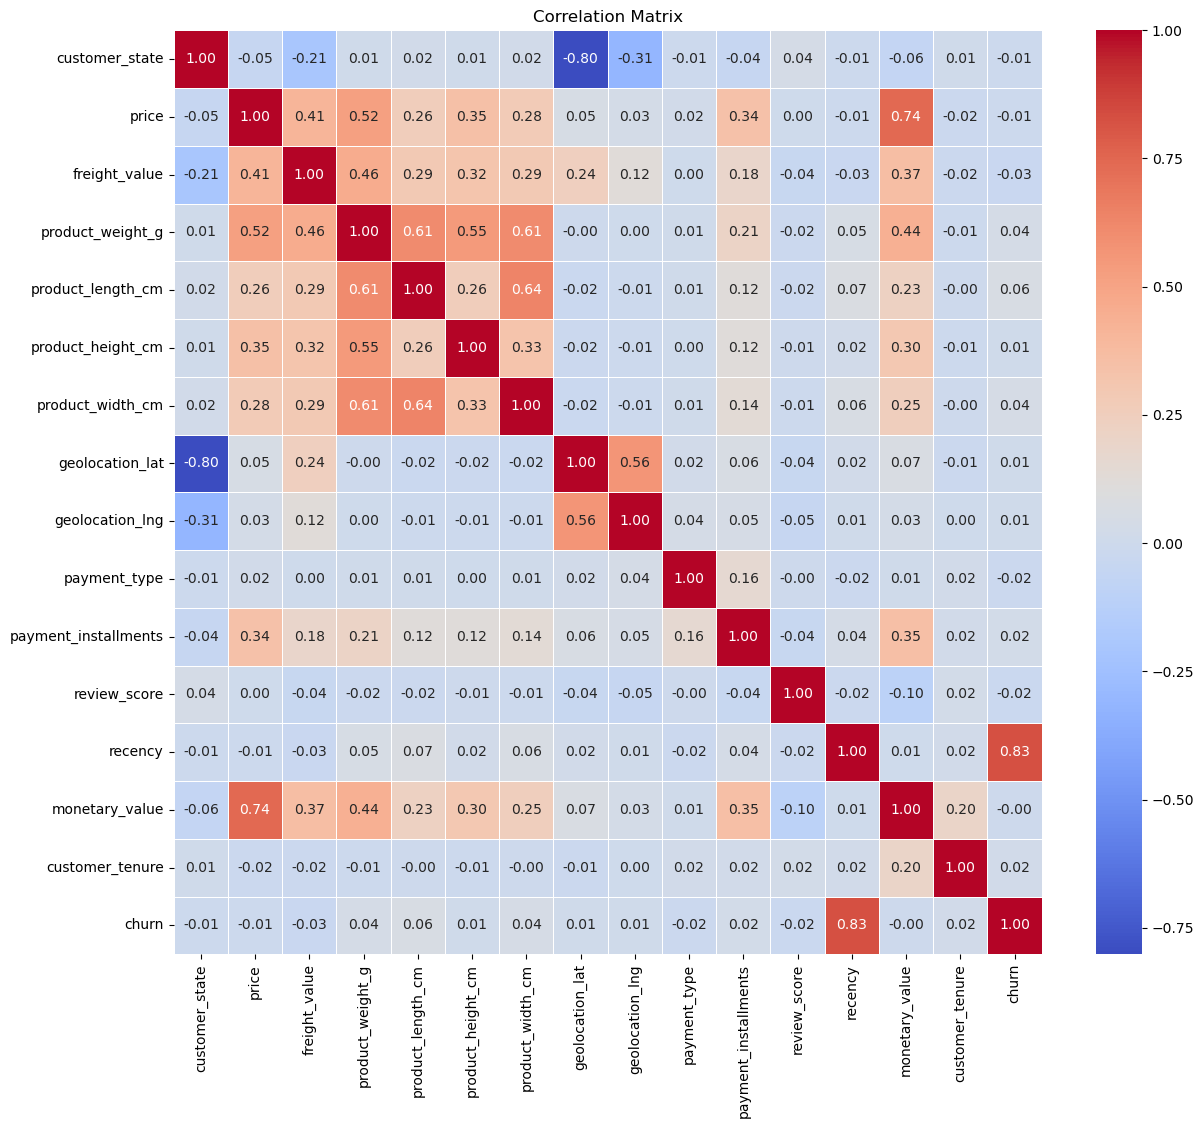

In [230]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



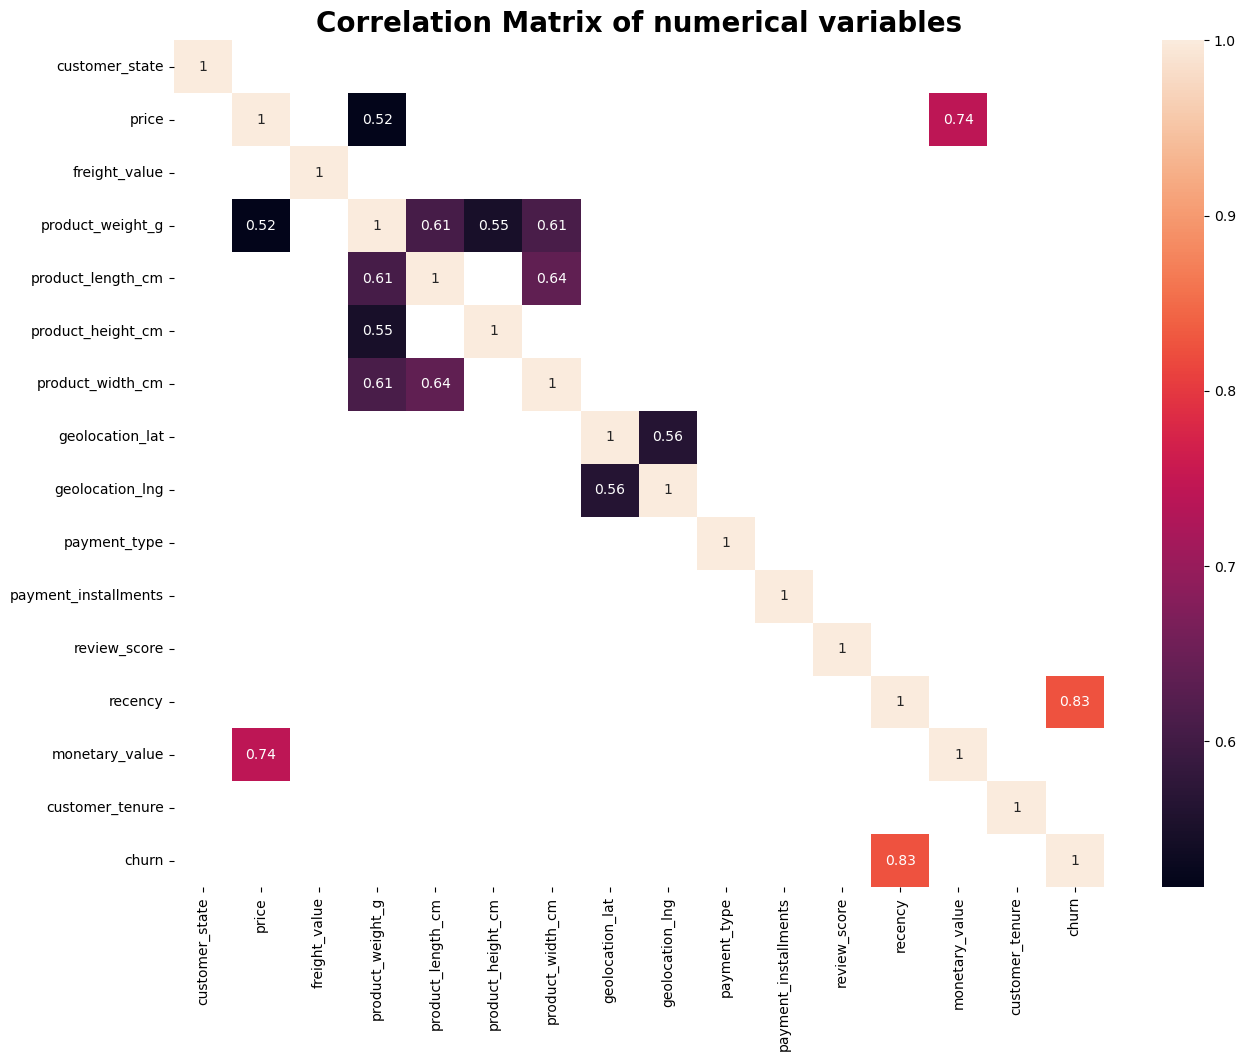

In [231]:
plt.figure(figsize=(15,11))
sns.heatmap(model_df.corr()[model_df.corr() > 0.5], annot = True)
plt.title('Correlation Matrix of numerical variables',fontsize=20,fontweight='bold')
plt.show()

In [232]:
#model_df = final[['recency','frequency','monetary_value','price','freight_value','review_score','churn']]
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,1.351269,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,0.476697,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,1.391604,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,-0.044579,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,1.588369,0.196054,-0.218103,1


#### Feature Transformation

In [233]:
from scipy.stats import skew, kurtosis

In [234]:
feature_trans = model_df.copy()
feature_normal = []
feature_not_normal = []

for i in feature_trans:
  skw = skew(model_df[i])
  kts = kurtosis(model_df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_not_normal.append(i)
  else:
    feature_not_normal.append(i)

print('Normal_distribution:', feature_normal)
print('Not_normal_distribution:', feature_not_normal)

Normal_distribution: ['customer_state', 'price', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'review_score', 'recency', 'monetary_value', 'churn']
Not_normal_distribution: ['freight_value', 'product_weight_g', 'payment_type', 'payment_installments', 'customer_tenure']


#### Model

In [235]:
#model_df['churn'] = final['churn'].astype(int)
#model_df['churn'] = model_df.churn.astype('int')

In [236]:
model_df['churn'].unique()

array([1, 0])

In [237]:
model_df.drop(columns = ['recency'], axis = 1, inplace = True)

In [238]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,monetary_value,customer_tenure,churn
0,3,0.556477,0.379719,1.700641,1.427791,2.318926,0.947626,0.371560,-0.303531,1,0.085549,4,0.231236,-0.218103,1
1,2,0.449948,0.615390,1.700641,1.427791,2.318926,0.947626,2.302181,-2.509989,1,-0.909181,1,1.415916,-0.218103,1
3,4,0.556477,-0.197107,1.700641,1.427791,2.318926,0.947626,-2.301740,-1.416976,1,1.451582,3,0.185254,-0.218103,1
4,3,0.391961,1.007992,1.700641,1.427791,2.318926,0.947626,-0.124073,0.814411,1,1.758923,4,0.162070,-0.218103,1
5,4,0.573145,-0.256488,1.700641,1.427791,2.318926,0.947626,-1.532943,-0.751004,1,1.131397,4,0.196054,-0.218103,1


#### Observation:
The Recency feature is dropped for the model building, as it is used to create the target variable. 
Predictions would be 100% accurate if the Recency feature is not dropped.

In [239]:
from sklearn.model_selection import train_test_split
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree model¶

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 14)
y_train (80143,)
X_test (20036, 14)
y_test (20036,)


In [241]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [242]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)

In [243]:
ypred_proba_dt = decisionTree.predict(X_test)

In [244]:
ypred_dt = [0 if i < 0.5 else 1 for i in ypred_proba_dt]
ypred_dt[:10]

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1]

In [245]:
ypred_proba_dt_train = decisionTree.predict(X_train)
ypred_dt_train = [0 if i < 0.5 else 1 for i in ypred_proba_dt_train]

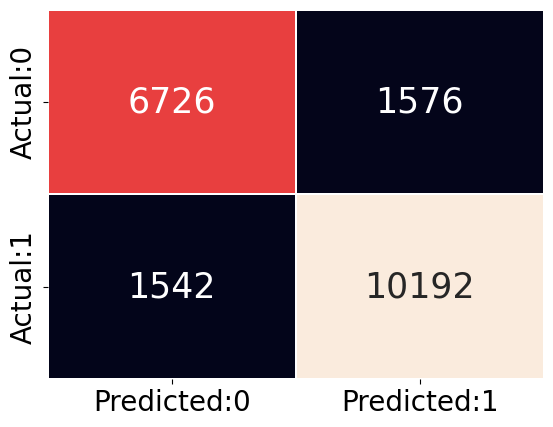

In [247]:
cm = confusion_matrix(y_test, ypred_dt)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [139]:
print(classification_report(y_test, ypred_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8302
           1       0.87      0.87      0.87     11734

    accuracy                           0.84     20036
   macro avg       0.84      0.84      0.84     20036
weighted avg       0.84      0.84      0.84     20036



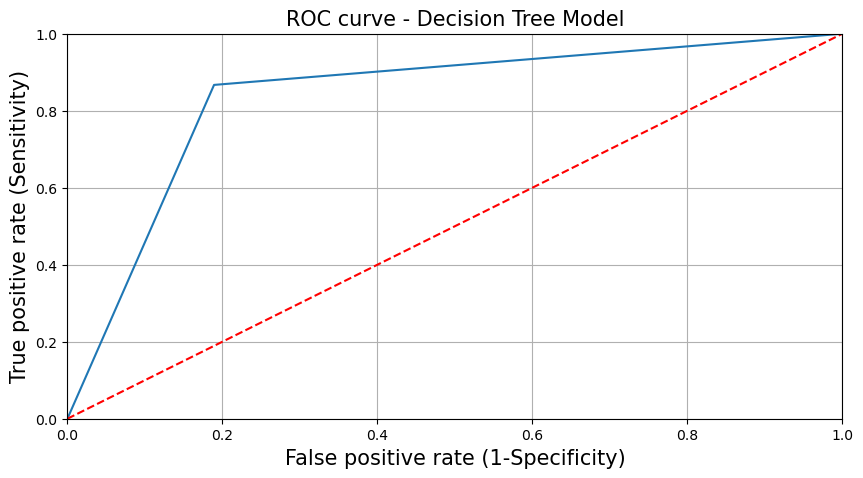

In [140]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Decision Tree Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

###  XG Boost Model¶

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 14)
y_train (80143,)
X_test (20036, 14)
y_test (20036,)


In [142]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [143]:
from xgboost import XGBClassifier
xgBoost = XGBClassifier()
xbBoost = xgBoost.fit(X_train, y_train)

In [144]:
ypred_proba_xg = xgBoost.predict(X_test)

In [145]:
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [146]:
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]

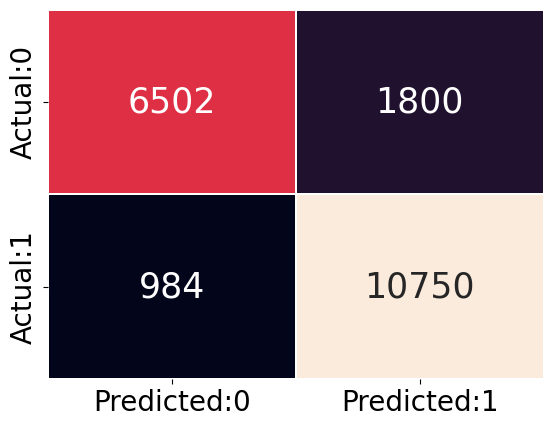

In [147]:
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [148]:
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8302
           1       0.86      0.92      0.89     11734

    accuracy                           0.86     20036
   macro avg       0.86      0.85      0.85     20036
weighted avg       0.86      0.86      0.86     20036



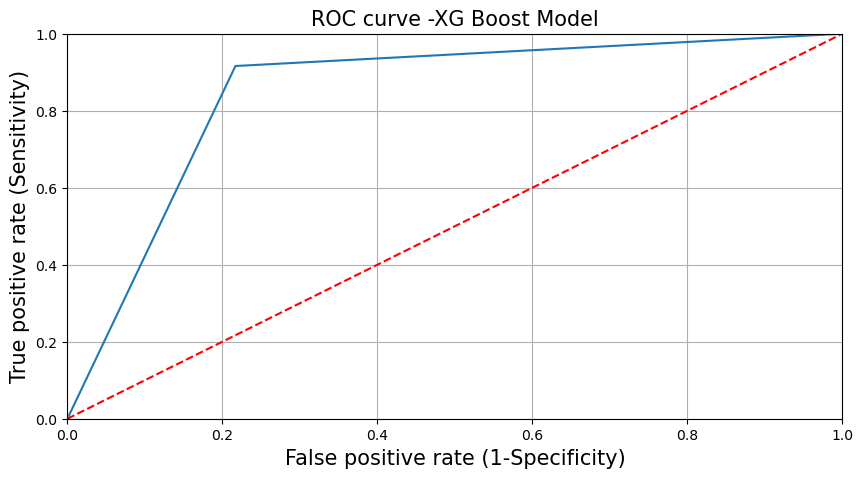

In [149]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -XG Boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Random Forest Classifier¶

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (80143, 14)
ytrain:  (80143,)
xtest:  (20036, 14)
ytest:  (20036,)


In [151]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [152]:
rand = RandomForestClassifier()
rand_model = rand.fit(X_train,y_train)

In [153]:
ypred_proba_random = rand_model.predict(X_test)

In [154]:
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

In [155]:
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

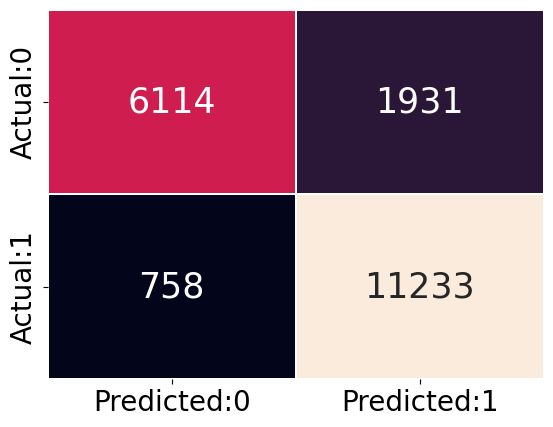

In [156]:
cm = confusion_matrix(y_test, ypred_random)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [157]:
print(classification_report(y_test, ypred_random))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8045
           1       0.85      0.94      0.89     11991

    accuracy                           0.87     20036
   macro avg       0.87      0.85      0.86     20036
weighted avg       0.87      0.87      0.86     20036



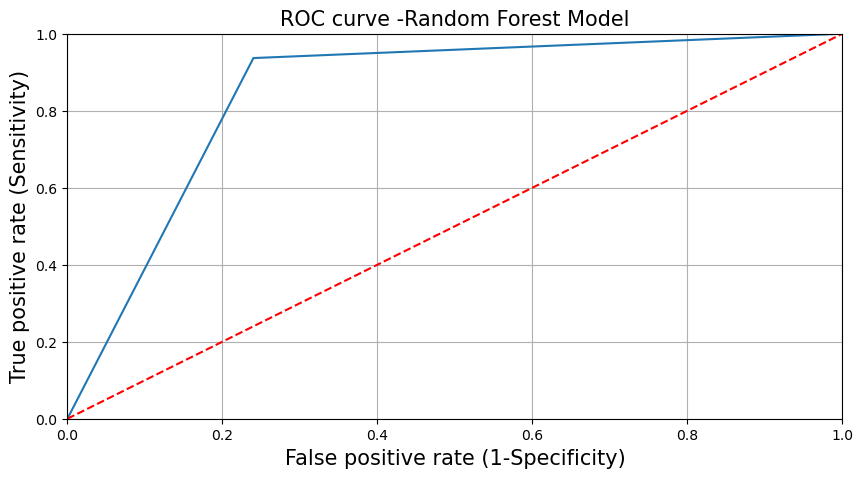

In [158]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -Random Forest Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Logistic Regression

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (80143, 14)
ytrain:  (80143,)
xtest:  (20036, 14)
ytest:  (20036,)


In [160]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

In [161]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)

In [162]:
ypred_proba_log = lr_model.predict(X_test)
ypred_log = [0 if i < 0.5 else 1 for i in ypred_proba_log]
ypred_log[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [163]:
ypred_proba_log_train = lr_model.predict(X_train)
ypred_log_train = [0 if i < 0.5 else 1 for i in ypred_proba_log_train]

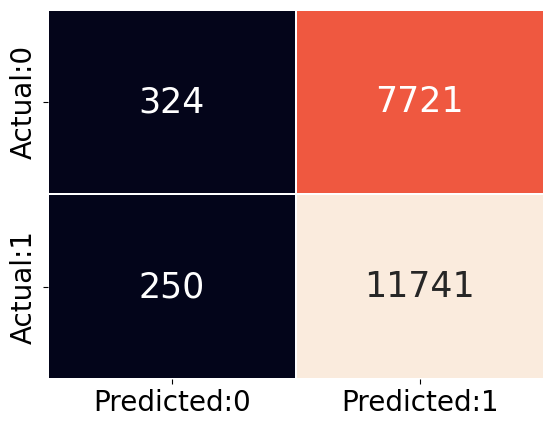

In [164]:
cm = confusion_matrix(y_test, ypred_log)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [165]:
print(classification_report(y_test, ypred_log))



              precision    recall  f1-score   support

           0       0.56      0.04      0.08      8045
           1       0.60      0.98      0.75     11991

    accuracy                           0.60     20036
   macro avg       0.58      0.51      0.41     20036
weighted avg       0.59      0.60      0.48     20036



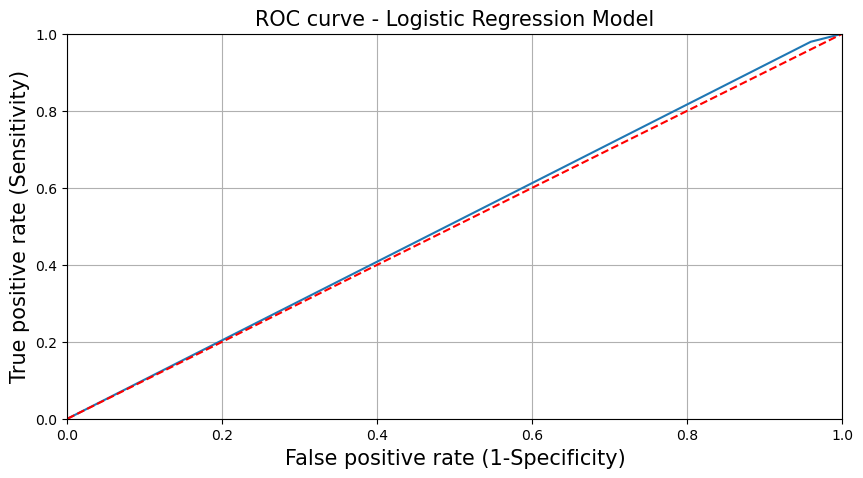

In [419]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_log)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Logistic Regression Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)


### Observation:
1. Logistic Regression:

    Accuracy: 60%
    Precision (churn=1): 60%
    Recall (churn=1): 98%
    F1-score (churn=1): 74%

Insights:

    Low precision for churn=1 suggests that there are false positives.
    High recall for churn=1 indicates the model is good at capturing actual churn cases.

2. Decision Tree model:

    Accuracy: 84%
    Precision (churn=1): 87%
    Recall (churn=1): 86%
    F1-score (churn=1): 87%

Insights:

    Balanced precision and recall for churn=1.
    Good overall performance.

3. XGBoost:

    Accuracy: 86%
    Precision (churn=1): 86%
    Recall (churn=1): 92%
    F1-score (churn=1): 89%

Insights:

    Good precision and recall for churn=1.
    Overall high performance.

4. Random Forest:

    Accuracy: 87%
    Precision (churn=1): 86%
    Recall (churn=1): 93%
    F1-score (churn=1): 89%

Insights:

    Similar performance to XGBoost, with high precision and recall for churn=1.
    
    

From above observation, its clear that XG boost and Random forest are the best performing models. Now we will do Feature Importance Analysis:

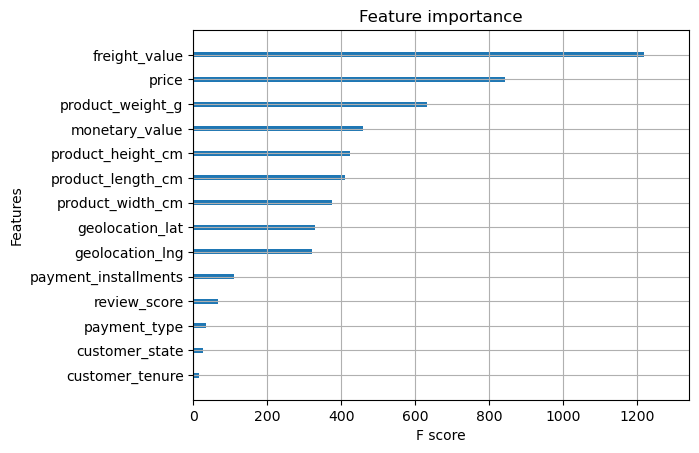

Top 10 important features: ['freight_value', 'price', 'product_weight_g', 'monetary_value', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'payment_installments']


In [166]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Assuming xgBoost is your trained XGBoost model
xgBoost = XGBClassifier()
xgBoost.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgBoost, importance_type='weight', show_values=False)
plt.show()

# Extract the top N important features
top_n = 10  # Specify the number of top features you want to consider
important_features_xgboost = xgBoost.get_booster().get_score(importance_type='weight')
important_features_xgboost = sorted(important_features_xgboost.items(), key=lambda x: x[1], reverse=True)[:top_n]
important_features_xgboost = [feature[0] for feature in important_features_xgboost]

print("Top", top_n, "important features:", important_features_xgboost)


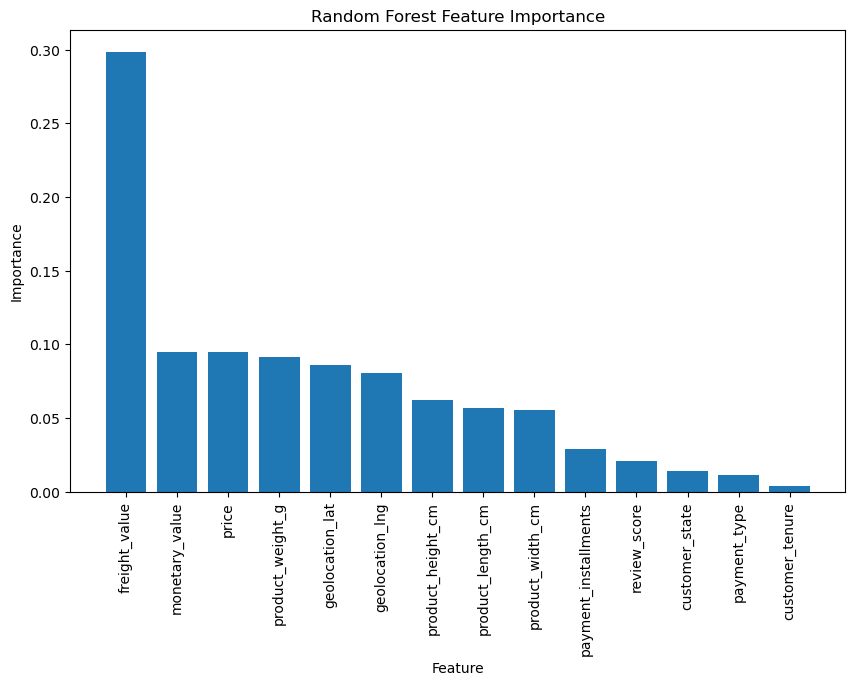

Top 10 important features: ['freight_value', 'monetary_value', 'price', 'product_weight_g', 'geolocation_lat', 'geolocation_lng', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'payment_installments']


In [169]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming rand is your trained RandomForestClassifier model
rand = RandomForestClassifier()
rand_model = rand.fit(X_train, y_train)

# Plot feature importance
feature_importance = rand_model.feature_importances_
features = X_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Specify the number of top features you want to consider (e.g., top 10)
top_n = 10

# Get the top N important features
important_features = [features[i] for i in sorted_idx[:top_n]]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

print("Top", top_n, "important features:", important_features)



### Hyperparameter tuning

#### XG boost

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_xgboost], y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80143, 10)
y_train (80143,)
X_test (20036, 10)
y_test (20036,)


In [171]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgBoost = XGBClassifier(random_state = 10)

In [172]:
# Define hyperparameter grid for fine-tuning
parameters = [
    {'n_estimators': [30, 40, 50, 70, 90],
     'max_depth': range(2, 7),
     'learning_rate': [0.1, 0.2, 0.4, 0.5]}]

In [173]:
# Create a GridSearchCV object for XGBoost
gcv_xgb = GridSearchCV(estimator=xgBoost, param_grid=parameters, cv=5)
gcv_xgb.fit(X_train, y_train)
            
# Print the best parameters
print("Best Parameters for XGBoost:", gcv_xgb.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 90}


In [174]:
# Initialize XGBoost classifier with best parameters
xgBoost = XGBClassifier(learning_rate=0.5, max_depth=6, n_estimators=90)
xgBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [175]:
# Predictions on the test set
ypred_proba_xg = xgBoost.predict(X_test)
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [176]:
# Predictions on the training set
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]


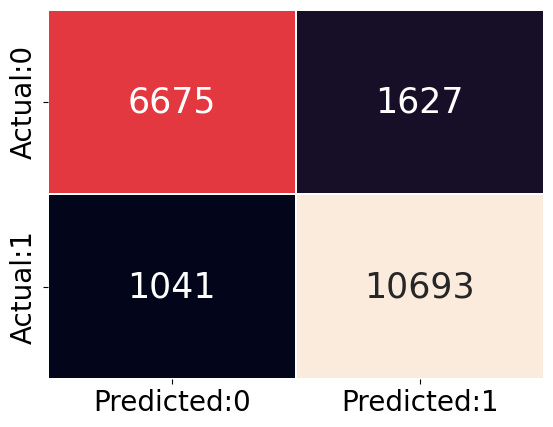

In [177]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [178]:
# Classification Report
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      8302
           1       0.87      0.91      0.89     11734

    accuracy                           0.87     20036
   macro avg       0.87      0.86      0.86     20036
weighted avg       0.87      0.87      0.87     20036



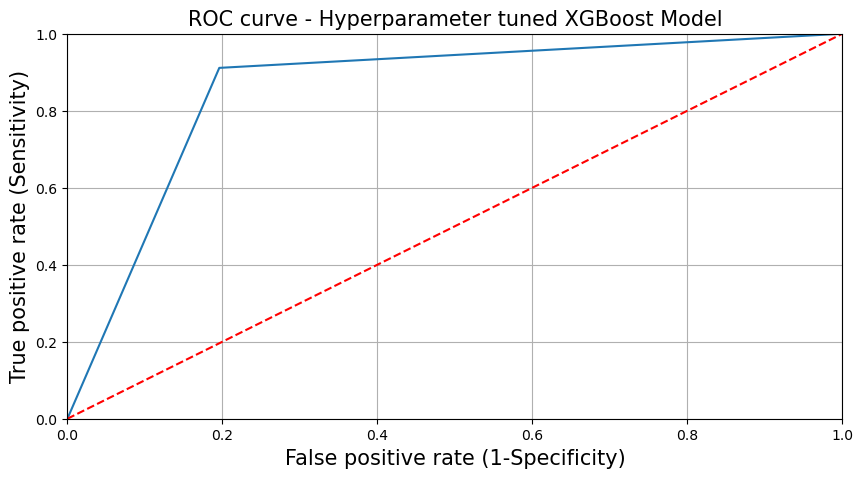

In [179]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned XGBoost Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.grid(True)
plt.show()

### Random Forest

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_rf], y, test_size=0.2, random_state=500)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)


X_train:  (80143, 10)
y_train:  (80143,)
X_test:  (20036, 10)
y_test:  (20036,)


In [433]:
# Initialize RandomForest classifier
rand = RandomForestClassifier(random_state=10)

# Define hyperparameter grid for fine-tuning
parameters = [
    {'criterion': ['gini', 'entropy'],
     'max_features': ['sqrt', 'log2'],
     'max_depth': range(2, 7),
     'min_samples_split': range(2, 7),
     'max_leaf_nodes': range(2, 10)}
]

In [434]:
# Create a GridSearchCV object for RandomForest
gcv_rf = GridSearchCV(estimator=rand, param_grid=parameters, cv=5,n_jobs=8)
gcv_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Random Forest:", gcv_rf.best_params_)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_split': 2}


In [441]:
# Initialize RandomForest classifier with best parameters
rand = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', max_leaf_nodes=9, min_samples_split=2)
rand_model = rand.fit(X_train, y_train)


In [442]:
# Predictions on the test set
ypred_proba_random = rand_model.predict(X_test)
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1]

In [443]:
# Predictions on the training set
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

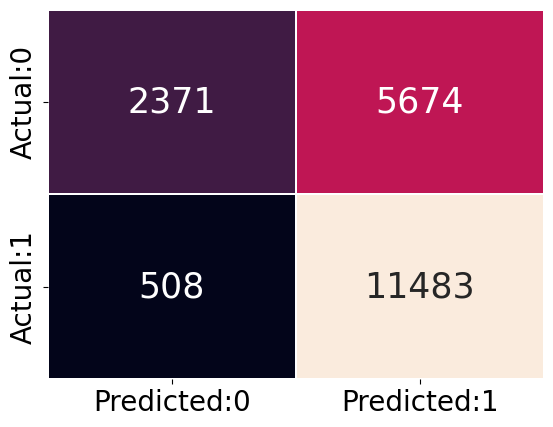

In [444]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_random)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [445]:

# Classification Report
print(classification_report(y_test, ypred_random))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43      8045
           1       0.67      0.96      0.79     11991

    accuracy                           0.69     20036
   macro avg       0.75      0.63      0.61     20036
weighted avg       0.73      0.69      0.65     20036



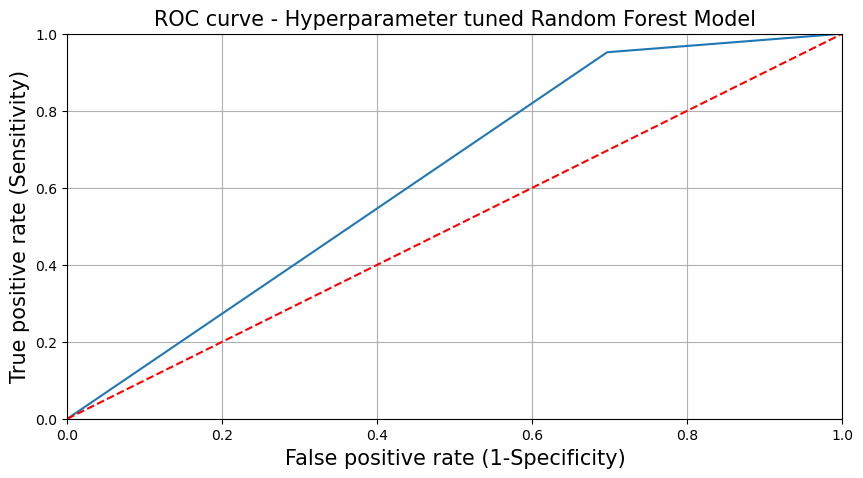

In [440]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned Random Forest Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.grid(True)
plt.show()

### Model Interpretation

### XG boost is performing better than random forest. 